In [5]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel("./data/Dengue_2001-2024.xlsx")

data_epidemic = data[data['Year'] <= 2018]

data_epidemic.set_index('Year')

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
Year,,,,,,,,,,,,
2001,136578600,1049,32505706,104072893,33.24,18.28,139.92,2198.86,73.42,25.94,2430,44
2002,138612896,1065,33960159,104652737,33.44,17.68,156.25,2127.61,73.17,25.82,6232,58
2003,140647193,1080,35443092,105204100,33.52,18.08,141.08,2159.29,73.67,25.75,486,10
2004,142681489,1096,36954505,105726983,33.55,18.02,195.58,2112.04,72.67,25.88,3934,14
2005,144715786,1112,38494399,106221386,33.67,18.73,219.75,2092.13,72.83,26.24,1048,4
2006,146213025,1123,40033126,106179898,34.62,18.65,159.92,2205.12,71.42,26.47,2200,11
2007,147710264,1134,41595210,106115053,33.90,18.29,240.42,2246.41,73.17,25.71,466,0
2008,149207503,1146,43180651,106026851,33.67,18.34,184.75,2384.65,73.42,25.88,1153,0
2009,150704742,1157,44789449,105915292,34.66,18.68,160.92,2155.83,70.25,26.52,474,0


In [6]:
# Drop the 'Year' column and describe the data
description = data_epidemic.drop(columns=['Year']).describe()

# Round the non-population columns to 2 decimal places
description.loc[:, description.columns.difference(['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death'])] = description.loc[:, description.columns.difference(['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death'])].round(2)

# Ensure population columns are integers
description[['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death']] = description[['Population', 'Population Density', 'UPop', 'RPop', 'Infected', 'Death']].astype(int)

description

,Population,Population Density,UPop,RPop,Tmax,Tmin,Rainfall,Precipitation,Relative Humidity,Dry Bulb Temperature,Infected,Death
count,18,18,18,18,18.00,18.00,18.00,18.00,18.00,18.00,18,18
mean,151015240,1159,46060312,104954927,34.03,18.58,161.67,2194.54,71.90,26.13,2512,11
std,8278126,63,8927728,1113831,0.46,0.46,40.93,108.45,1.37,0.31,2643,16
min,136578600,1049,32505706,102567324,33.24,17.68,110.75,1971.07,69.83,25.71,375,0
25%,145090095,1114,38879080,104174437,33.66,18.30,132.23,2127.56,70.56,25.88,532,0
50%,151453361,1163,45605526,105187799,34.14,18.57,152.12,2174.22,72.08,26.09,1554,6
75%,157587879,1210,53030583,105881563,34.35,18.72,183.69,2241.01,73.17,26.34,3063,13
max,163532086,1256,60964761,106221386,34.67,19.52,241.00,2384.65,73.67,26.73,10148,58


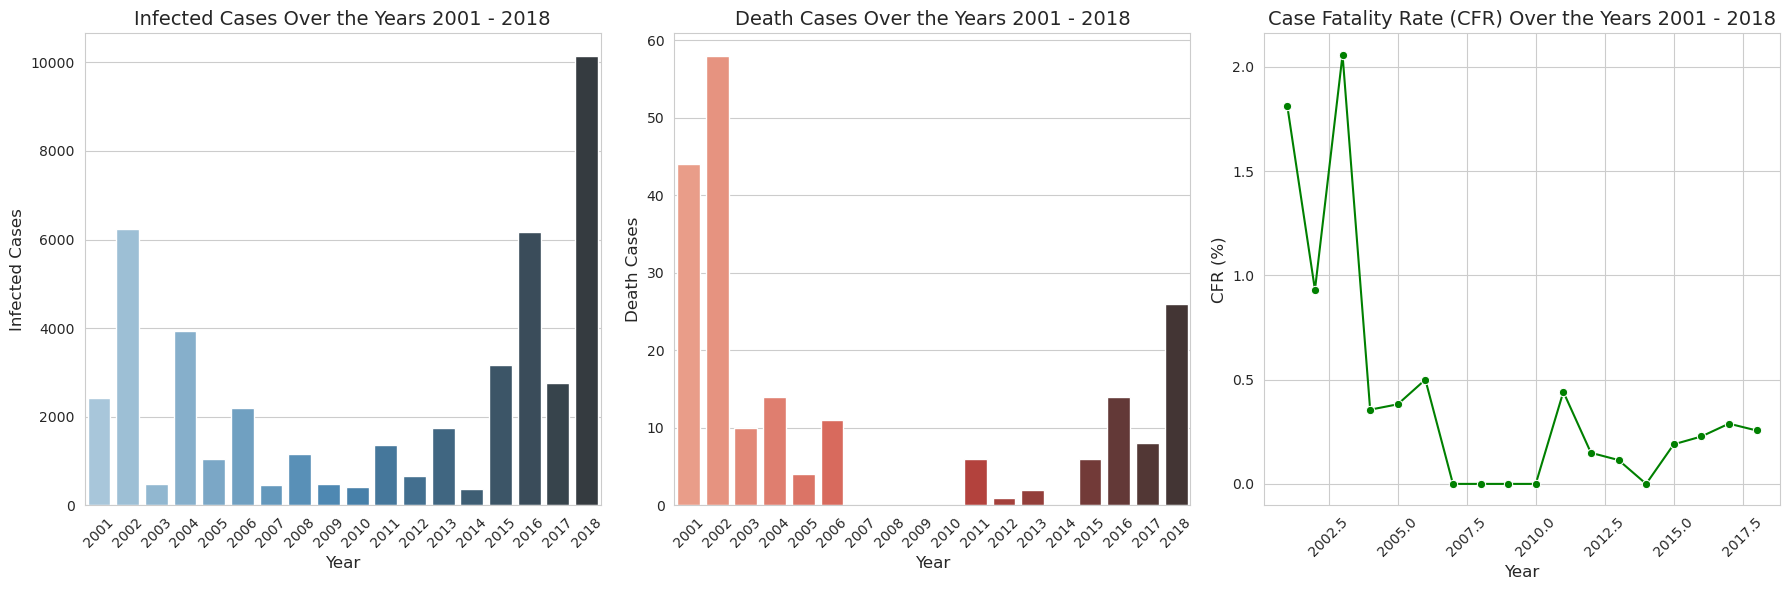

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data by calculating CFR if not already done
data_epidemic['CFR'] = (data_epidemic['Death'] / data_epidemic['Infected']) * 100

# Create a figure with 3 subplots for Infected, Death, and CFR
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Infected cases
sns.barplot(data=data_epidemic.reset_index(), x='Year', y='Infected', palette='Blues_d', ax=axes[0])
axes[0].set_title('Infected Cases Over the Years 2001 - 2018', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Infected Cases', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Death cases
sns.barplot(data=data_epidemic.reset_index(), x='Year', y='Death', palette='Reds_d', ax=axes[1])
axes[1].set_title('Death Cases Over the Years 2001 - 2018', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Death Cases', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Line plot for CFR
sns.lineplot(data=data_epidemic.reset_index(), x='Year', y='CFR', marker='o', color='green', ax=axes[2])
axes[2].set_title('Case Fatality Rate (CFR) Over the Years 2001 - 2018', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylabel('CFR (%)', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

# Adjust the layout
plt.tight_layout()
plt.show()


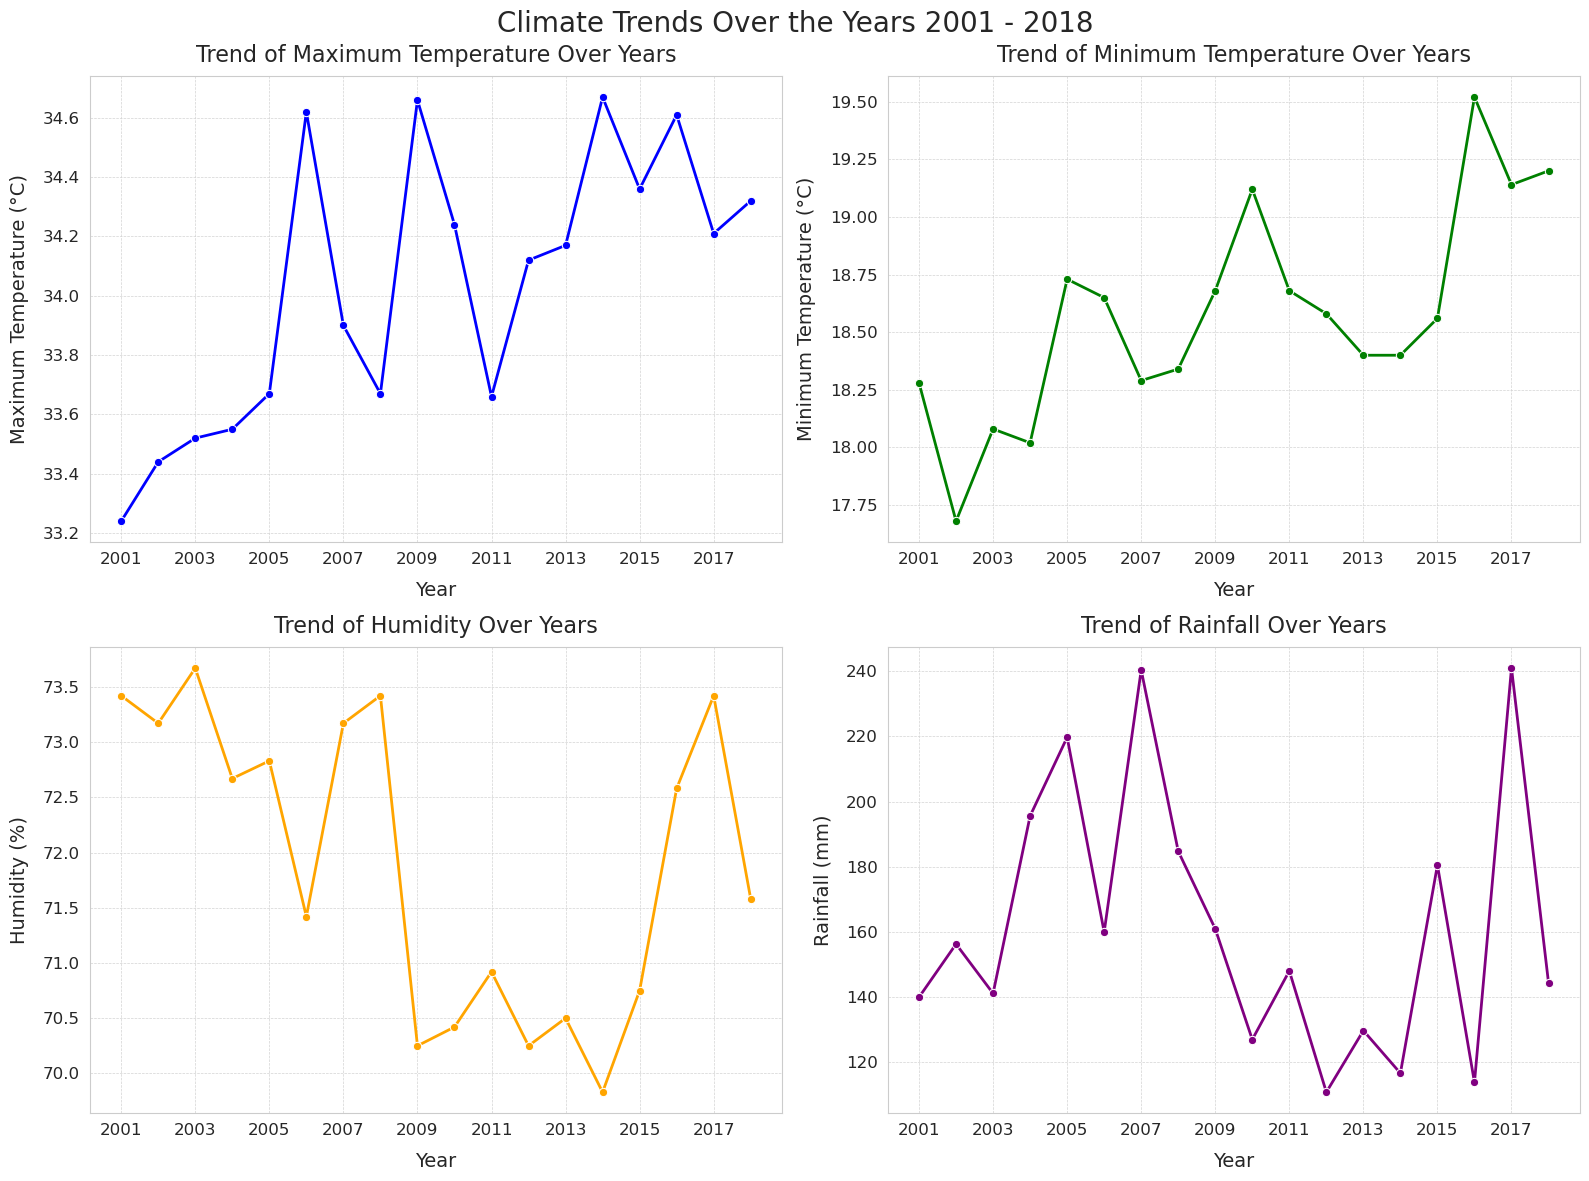

In [13]:
# Create subplots for visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Set a consistent style
sns.set_style('whitegrid')

# Plot Max T trend
sns.lineplot(
    ax=axes[0, 0],
    x='Year',
    y='Tmax',
    data=data_epidemic,
    color='blue',
    marker='o',
    linewidth=2
)
axes[0, 0].set_title('Trend of Maximum Temperature Over Years', fontsize=16, pad=10)
axes[0, 0].set_xlabel('Year', fontsize=14, labelpad=10)
axes[0, 0].set_ylabel('Maximum Temperature (°C)', fontsize=14, labelpad=10)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)
axes[0, 0].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[0, 0].set_xticks(range(2001, 2019, 2))

# Plot Min T trend
sns.lineplot(
    ax=axes[0, 1],
    x='Year',
    y='Tmin',
    data=data_epidemic,
    color='green',
    marker='o',
    linewidth=2
)
axes[0, 1].set_title('Trend of Minimum Temperature Over Years', fontsize=16, pad=10)
axes[0, 1].set_xlabel('Year', fontsize=14, labelpad=10)
axes[0, 1].set_ylabel('Minimum Temperature (°C)', fontsize=14, labelpad=10)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)
axes[0, 1].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[0, 1].set_xticks(range(2001, 2019, 2))

# Plot Humidity trend
sns.lineplot(
    ax=axes[1, 0],
    x='Year',
    y='Relative Humidity',
    data=data_epidemic,
    color='orange',
    marker='o',
    linewidth=2
)
axes[1, 0].set_title('Trend of Humidity Over Years', fontsize=16, pad=10)
axes[1, 0].set_xlabel('Year', fontsize=14, labelpad=10)
axes[1, 0].set_ylabel('Humidity (%)', fontsize=14, labelpad=10)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)
axes[1, 0].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[1, 0].set_xticks(range(2001, 2019, 2))

# Plot Rainfall trend
sns.lineplot(
    ax=axes[1, 1],
    x='Year',
    y='Rainfall',
    data=data_epidemic,
    color='purple',
    marker='o',
    linewidth=2
)
axes[1, 1].set_title('Trend of Rainfall Over Years', fontsize=16, pad=10)
axes[1, 1].set_xlabel('Year', fontsize=14, labelpad=10)
axes[1, 1].set_ylabel('Rainfall (mm)', fontsize=14, labelpad=10)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)
axes[1, 1].grid(color='lightgray', linestyle='--', linewidth=0.5)
axes[1, 1].set_xticks(range(2001, 2019, 2))

plt.suptitle('Climate Trends Over the Years 2001 - 2018', fontsize=20)

# Adjust layout for better display
plt.tight_layout()

# Display the plots
plt.show()


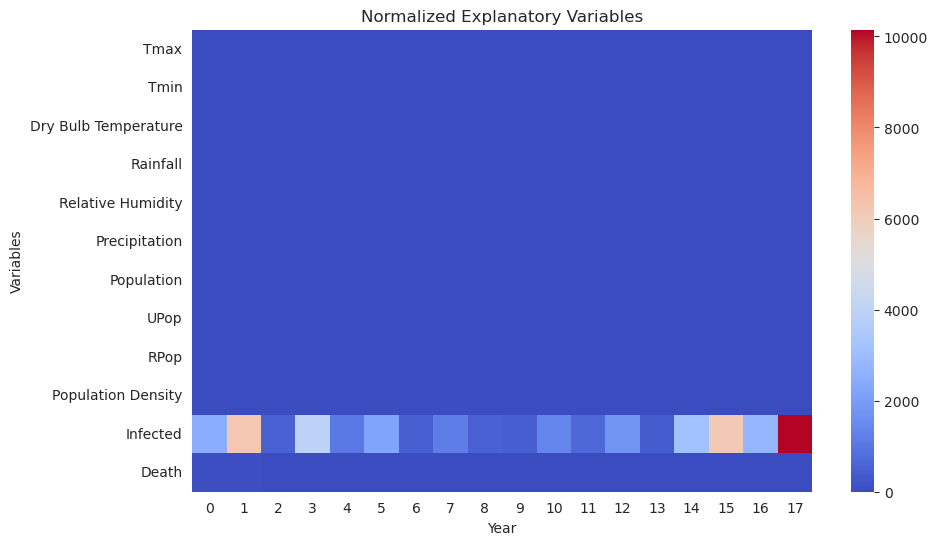

In [15]:
# Normalize the data
normalized_data = data_epidemic[
    [
        "Tmax",
        "Tmin",
        "Dry Bulb Temperature",
        "Rainfall",
        "Relative Humidity",
        "Precipitation",
        "Population",
        "UPop",
        "RPop",
        "Population Density",
    ]
].apply(pd.to_numeric)

# Standardize the data
normalized_data = (normalized_data - normalized_data.mean()) / normalized_data.std()

# Clip extreme values to improve visualization
normalized_data = normalized_data.clip(lower=-3, upper=3)

# Add the Infected and Death columns back for comparison
normalized_data["Infected"] = data_epidemic["Infected"]
normalized_data["Death"] = data_epidemic["Death"]

# Display the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data.T, cmap="coolwarm", annot=False, cbar=True)
plt.title("Normalized Explanatory Variables")
plt.xlabel("Year")
plt.ylabel("Variables")
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of Explanatory Variables and Infections (2001 - 2018)')

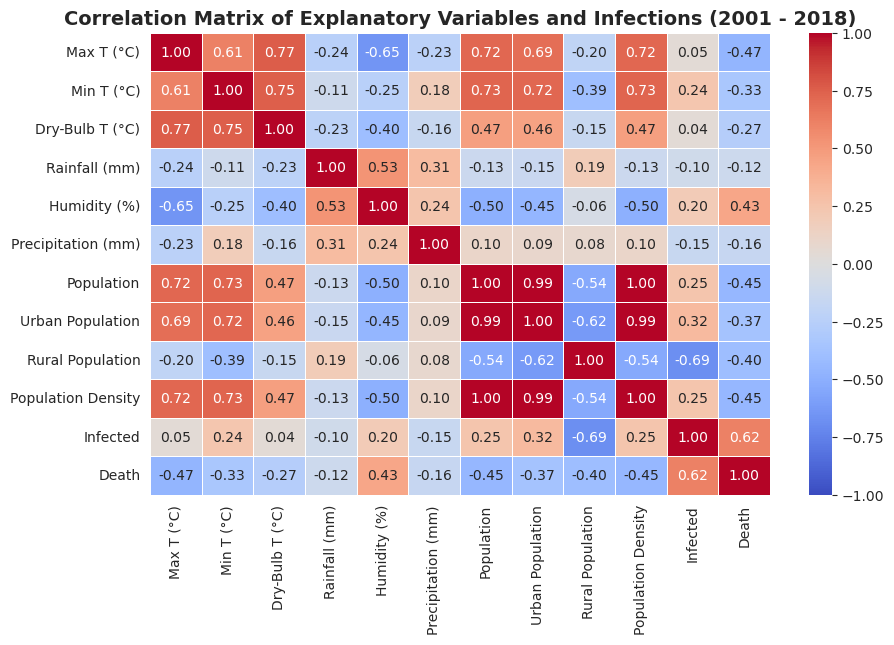

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Define the mapping for axis label updates
axis_label_map = {
    "Tmax": "Max T (°C)",
    "Tmin": "Min T (°C)",
    "Dry Bulb Temperature": "Dry-Bulb T (°C)",
    "Rainfall": "Rainfall (mm)",
    "Relative Humidity": "Humidity (%)",
    "Precipitation": "Precipitation (mm)",
    "RPop": "Rural Population",
    "UPop": "Urban Population",
    "Population Density": "Population Density"
}

# Step 2: Update correlation matrix labels
correlation_matrix = normalized_data.corr()
correlation_matrix.rename(index=axis_label_map, columns=axis_label_map, inplace=True)

# Step 3: Plot the updated correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix of Explanatory Variables and Infections (2001 - 2018)", fontsize=14, fontweight="bold")